## 二次元配列と勾配問題

機械学習においては関数の最小値を見つけることが重要になってきます。

そのために使われるのが勾配降下法です。


この課題では勾配降下法を理解する準備として、NumPyを用いて関数の勾配を考えていきます。


## 【問題1】1次関数

$x$ が-50から50の範囲で次の式を考えます。

**y = 1 / 2 * x + 1**

-50から50まで0.1間隔のxを表すndarrayと、各要素に対するyを表すndarrayを作成してください。

In [45]:
import numpy as np

x_ndarray = np.arange(-50, 50 + 0.1, 0.1)

def calc(x):
    y = 1 / 2 * x + 1
    return y

y_ndarray = np.array(calc(x_ndarray))

# 回答
print(x_ndarray)
print(y_ndarray)
# print(len(x_ndarray))
# print(len(y_ndarray))

[-50.  -49.9 -49.8 ...  49.8  49.9  50. ]
[-24.   -23.95 -23.9  ...  25.9   25.95  26.  ]


## 【問題2】配列の結合

問題1で作成したndarrayを結合し、(1001, 2)の形の配列にしてください。

0列目にx、1列目にyが来るようにします。

In [63]:
join_ndarray = np.concatenate([x_ndarray,y_ndarray])

# print(join_ndarray)

join_ndarray = join_ndarray.reshape(1001, 2)

# 回答
print(join_ndarray.shape)

(1001, 2)


## 【問題3】勾配を求める

各x座標における勾配を求めます。ここで勾配はyの変化量をxの変化量で割ることで計算します。

In [120]:
# yの変化量
y_change = y_ndarray[2] - y_ndarray[1]
# xの変化量
x_change = x_ndarray[2] - x_ndarray[1]

# 回答
print("yの変化量は{}です".format(y_change))
print("xの変化量は{}です".format(x_change))

# koubai = np.array([y_change / x_change])

yの変化量は0.05000000000000071です
xの変化量は0.10000000000000142です


## 【問題4】グラフを描く

1次関数のグラフをMatplotlibを用いて描いてください。

また、それとは別に横軸をx、縦軸を勾配としたグラフも描いてください。


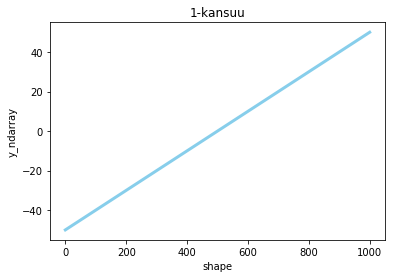

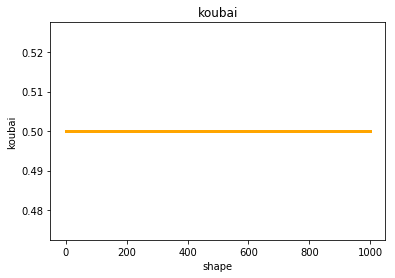

In [132]:
import matplotlib.pyplot as plt
%matplotlib inline

# 回答
plt.title("1-kansuu")
plt.xlabel("shape")
plt.ylabel("y_ndarray")
plt.plot(x_ndarray,color='skyblue', linestyle='solid', linewidth=3, markersize=12)
plt.show()

# 勾配を求める
gradient = (y_ndarray[1:] - y_ndarray[:-1]) / (x_ndarray[1:] - x_ndarray[:-1])


plt.title("koubai")
plt.xlabel("shape")
plt.ylabel("koubai")
plt.plot(gradient,color='orange', linestyle='solid', linewidth=3, markersize=12)
plt.show()



## 【問題5】Pythonの関数化

問題1から問題3までの範囲をまとめて行うPythonの関数を雛形を参考に作成してください。


そして、以下の3式の勾配を0.1間隔で求めてndarrayで出力してください。


y
=
x
2
(
−
50
≤
x
≤
50
)


y
=
2
x
2
+
2
x
(
−
50
≤
x
≤
50
)


y
=
s
i
n
(
x
1
2
)
(
0
≤
x
≤
50
)



また、問題4と同様にグラフを描いてください。


ndarrayに対して三角関数のsinの計算を行うには np.sin()を用います。



[-50.   -49.9  -49.8  ...  25.9   25.95  26.  ]


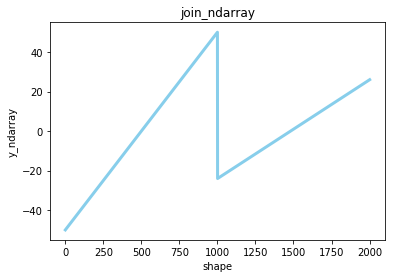

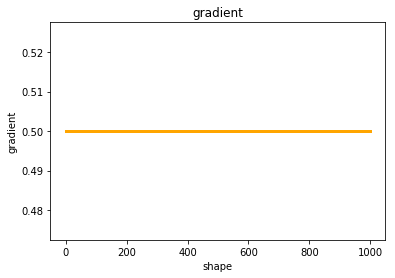

[0.26237485 0.35739993 0.44885398 ... 0.69416467 0.72927296 0.76255845]


In [164]:
import matplotlib.pyplot as plt
%matplotlib inline

def compute_gradient(x_ndarray):
    """
    変化量を使い勾配を計算する。
    Parameters
    ----------------
    x_ndarray
      求めたい関数、xのndarrayを入れるとyのndarrayを返すもの。
      
    Returns
    ----------------
    join_ndarray : ndarray, shape(n, 2)
      xとyを結合したもの。nはx_rangeに依存する。
      
    gradient : ndarray, shape(n-1,)
      関数の勾配。差をとるため要素は1つ減る
    """
    y_ndarray = 1 / 2 * x_ndarray + 1
    join_ndarray = np.concatenate([x_ndarray,y_ndarray])
    
    # 勾配
    gradient = (y_ndarray[1:] - y_ndarray[:-1]) / (x_ndarray[1:] - x_ndarray[:-1])
    
    return  join_ndarray, gradient

# 回答
answer = compute_gradient(x_ndarray)
join_ndarray = answer[0]
gradient = answer[1]
print(join_ndarray)

# 結合した配列のグラフ
plt.title("join_ndarray")
plt.xlabel("shape")
plt.ylabel("y_ndarray")
plt.plot(join_ndarray,color='skyblue', linestyle='solid', linewidth=3, markersize=12)
plt.show()

# 勾配のグラフ
plt.title("gradient")
plt.xlabel("shape")
plt.ylabel("gradient")
plt.plot(gradient,color='orange', linestyle='solid', linewidth=3, markersize=12)
plt.show()

# 三角関数を求める
print(np.sin(join_ndarray))

## 【問題6】最小値を求める

問題5で扱った関数のyの最小値を求めます。xの範囲も問題5と同様とします。


今回は勾配降下法ではなく、ndarrayのminメソッド、argminメソッドを用いてください。

minメソッドは最小値を、argminメソッドは最小値のインデックスを取得することができます。


また、最小のyをとる前後の勾配を表示してください。

In [178]:
# 回答

# 勾配を求める
print(np.min(gradient))
print(np.argmin(gradient))

# 配列の最小値
print(np.min(join_ndarray))
print(np.argmin(join_ndarray))


# 前後の勾配
print(np.min(gradient[+1]))
print(np.min(join_ndarray[+1]))

0.5
0
-50.0
0
0.5
-49.9
